In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Project /Customer Churn Prediction/churn-bigml-80.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## **Due to the high cardinality and sparse data in the State feature, I dropped this column.**
1. High cardinality can introduce complexity and lead to overfitting, where the model learns patterns specific to certain states rather than generalizable trends.
2. If some states have very few data points, the model may not learn meaningful patterns for those states, leading to unreliable predictions for customers from those regions.

In [4]:
df = df.drop('State', axis=1)
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


Churn
False    2278
True      388
Name: count, dtype: int64


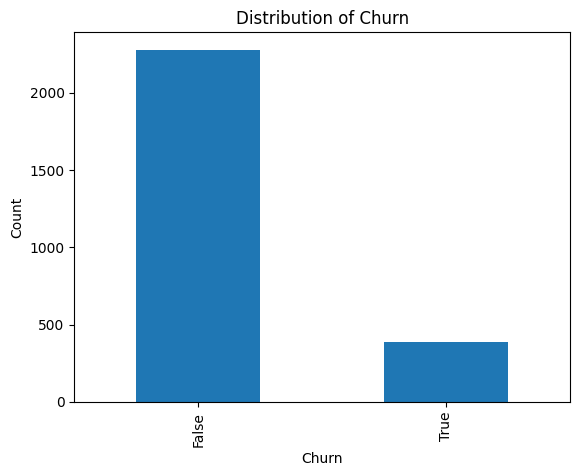

In [5]:
import matplotlib.pyplot as plt
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()


## **Do not train the model if you do not handle imbalanced datasets.**

1. Since we have only 388 data of "True" and 2,278 data of "False" in the Churn data, this imbalance can lead to the model being biased towards predicting "False" more often.

2. Oversampling can be done by as adding more copies to the minority class. This is done until the majority and minority class is balanced out nearly close.Oversampling can be a good choice when we dont have a ton of data.

In [6]:
# Upsample the minority class
import pandas as pd
from sklearn.utils import resample
df_majority = df[df.Churn==False]
df_minority = df[df.Churn==True]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)


df = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts after balanced dataset
df.Churn.value_counts()


,count
Churn,
False,2278
True,2278


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['International plan'] = label_encoder.fit_transform(df['International plan'])
df['Voice mail plan'] = label_encoder.fit_transform(df['Voice mail plan'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,120,408,0,0,0,212.1,131,36.06,209.4,104,17.80,167.2,96,7.52,5.3,5,1.43,1,1
1062,55,408,0,0,0,285.7,124,48.57,230.9,106,19.63,230.7,140,10.38,14.8,7,4.00,0,1
2165,125,415,1,1,29,260.8,81,44.34,163.7,112,13.91,271.7,117,12.23,17.0,6,4.59,1,1
2114,141,415,0,1,32,322.4,92,54.81,283.2,107,24.07,209.5,111,9.43,6.7,3,1.81,1,1


In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

###**Normalization(Min-Max Scaling):**
- Normalization is the process of rescaling data in new range of **0 and 1.**
- Normalization is good to use when **our data does not follow a normal distribution(Gaussian distribution).**
- Mathematics behind  Min-Max Scaling as:

$$\text{X_scaled} = \frac{\mathbf{x} - \min{(\mathbf{x})}}{\max{(\mathbf{x})}-\min{(\mathbf{x})}}$$
- Where, x= variable value, min(x)  = Minimum value of the variable, max(x) = Maximum value of the variable, X_scaled=Rescaling  value.

- Importing the **MinMaxScaler  from Scikit-learn.**

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
sc_X= sc.fit_transform(X)

### **Applying Principal Component Analysis (PCA) for Dimensionality  Reduction**

1. We know that PCA performs best with a normalized feature set, so we apply it above.

2. After applying PCA, I reduced the features from 18 to 13 principal components, which capture 99% of the information from dataset.

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents= pca.fit_transform(sc_X)


In [11]:
variance = pca.explained_variance_ratio_
print(variance )

[2.76018459e-01 2.08110441e-01 1.66775489e-01 7.62333474e-02
 4.56626786e-02 4.30818113e-02 4.13612469e-02 3.33290155e-02
 2.99115916e-02 2.41876215e-02 1.93366462e-02 1.68157204e-02
 1.49881153e-02 4.18763602e-03 1.55309248e-07 1.91106130e-08
 4.91794768e-09 1.31090677e-09]


In [12]:
# Number of components that explain 99% or more of the variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= 0.99) + 1

print(f"Number of principal components to reach 99% variance: {n_components}")

Number of principal components to reach 99% variance: 13


In [13]:
pca_df = pd.DataFrame(principalComponents[:, :13], columns=[f'PC{i+1}' for i in range(13)])

# Reset index of both DataFrames to ensure unique index values
pca_df = pca_df.reset_index(drop=True)
final_df = pd.concat([pca_df, df['Churn'].reset_index(drop=True)], axis=1)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Churn
0,0.795378,-0.357958,-0.065523,-0.360611,-0.140929,0.030697,0.055265,-0.005536,0.128618,0.073633,-0.024697,-0.089072,-0.048921,0
1,0.829707,-0.339728,-0.069855,0.001146,-0.119967,-0.296952,0.117643,-0.070577,0.053138,0.011052,-0.110649,-0.094196,-0.091775,0
2,-0.288703,-0.253120,-0.004634,-0.115283,0.109876,0.151486,0.391540,-0.207296,0.130921,-0.045920,-0.062478,0.018991,-0.072706,0
3,-0.235018,0.144220,0.834361,-0.153330,-0.312061,0.621150,0.312065,0.008590,-0.105163,0.052831,0.143890,0.137758,0.158934,0
4,-0.206386,0.229493,0.790768,0.259487,-0.104984,0.166185,0.087022,0.103290,-0.155771,-0.134549,-0.094400,0.047739,-0.149416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,-0.297274,-0.335585,-0.037590,-0.052266,0.053427,0.325287,-0.175324,-0.095685,0.068199,0.014241,-0.205835,0.038182,-0.026592,1
4552,-0.307611,-0.313913,0.054567,-0.447148,0.082114,-0.278920,0.192017,-0.112190,-0.225319,-0.233255,-0.147688,0.077821,-0.024057,1
4553,0.919519,0.143099,0.842868,-0.295068,-0.198184,-0.272930,0.360972,0.016974,0.080308,-0.110998,0.137066,0.076739,-0.021114,1
4554,0.854563,-0.373803,-0.065915,-0.629696,0.046509,0.180829,-0.271534,0.070249,0.132441,-0.093186,0.069844,-0.059170,-0.059289,1


### **Traditional Machine Learning Models**
1. SVM, Random Forest, K-Nearest Neighbors, Logistic Regression.

SVM Accuracy: 0.8969
KNN Accuracy: 0.9261
Logistic Regression Accuracy: 0.7703
Random Forest Accuracy: 0.9861
Gradient Boosting Accuracy: 0.9122
Naive Bayes Accuracy: 0.8047


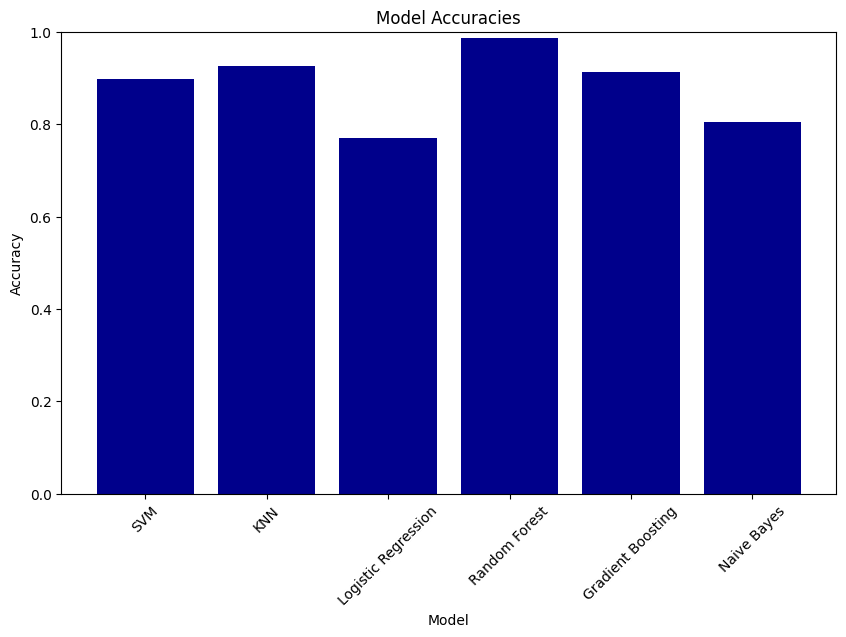

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

X = final_df.drop('Churn', axis=1)
y = final_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='darkblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### **Seq2Seq with LSTM Classifier Neural Networks Based Model**
1. Deep Learning Neural Networks are generally better at capturing complex relationships in data compared to Traditional Machine Learning Models. :

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

class ChurnDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

features = final_df.drop('Churn', axis=1)
labels = final_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

train_dataset = ChurnDataset(X_train, y_train)
test_dataset = ChurnDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Encoder, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)

    def forward(self, x):
        encoded_output, _ = self.lstm(x)
        return encoded_output

class Decoder(nn.Module):
    def __init__(self, hidden_dim):
        super(Decoder, self).__init__()
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        decoded_output, _ = self.lstm(x)
        last_step_output = decoded_output[:, -1, :]
        output = self.fc(last_step_output)
        return output

class Seq2SeqLSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Seq2SeqLSTMClassifier, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim)
        self.decoder = Decoder(hidden_dim)

    def forward(self, x):
        encoded_output = self.encoder(x)
        output = self.decoder(encoded_output)
        return output

input_dim = X_train.shape[1]
hidden_dim = 64

model = Seq2SeqLSTMClassifier(input_dim, hidden_dim)
criterion = nn.BCEWithLogitsLoss()

learning_rate = 0.02
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        batch_features = batch_features.unsqueeze(1)
        outputs = model(batch_features)
        loss = criterion(outputs.squeeze(), batch_labels)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 1 == 0:
        model.eval()
        y_true = []
        y_pred = []
        with torch.no_grad():
            for batch_features, batch_labels in test_loader:
                batch_features = batch_features.unsqueeze(1)
                outputs = model(batch_features)
                predictions = torch.round(torch.sigmoid(outputs.squeeze()))
                y_true.extend(batch_labels.numpy())
                y_pred.extend(predictions.numpy())

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"Epoch {epoch + 1}: Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, F1 Score: {f1:.3f}, ROC-AUC: {roc_auc:.3f}, Loss: {loss.item():.10f}")


Epoch 1: Accuracy: 0.828, Precision: 0.805, F1 Score: 0.827, ROC-AUC: 0.829, Loss: 0.3510090709
Epoch 2: Accuracy: 0.869, Precision: 0.892, F1 Score: 0.860, ROC-AUC: 0.868, Loss: 0.3064497411
Epoch 3: Accuracy: 0.879, Precision: 0.904, F1 Score: 0.870, ROC-AUC: 0.877, Loss: 0.3873292208
Epoch 4: Accuracy: 0.900, Precision: 0.913, F1 Score: 0.894, ROC-AUC: 0.899, Loss: 0.3628271520
Epoch 5: Accuracy: 0.907, Precision: 0.946, F1 Score: 0.899, ROC-AUC: 0.905, Loss: 0.4053771496
Epoch 6: Accuracy: 0.915, Precision: 0.947, F1 Score: 0.908, ROC-AUC: 0.913, Loss: 0.1206521019
Epoch 7: Accuracy: 0.920, Precision: 0.931, F1 Score: 0.916, ROC-AUC: 0.919, Loss: 0.3536577523
Epoch 8: Accuracy: 0.919, Precision: 0.919, F1 Score: 0.916, ROC-AUC: 0.919, Loss: 0.1722615361
Epoch 9: Accuracy: 0.921, Precision: 0.902, F1 Score: 0.920, ROC-AUC: 0.922, Loss: 0.1425446272
Epoch 10: Accuracy: 0.936, Precision: 0.944, F1 Score: 0.933, ROC-AUC: 0.935, Loss: 0.1129157916
Epoch 11: Accuracy: 0.934, Precision: 0